# Part II - Ford GoBike System Data
## by Ford GoBike System Data

## Investigation Overview


> the plot I chose show the distribution of key variables, Start locations density, End locations density,  and I tried to do density analysis of start, end, frequent trips


## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
data = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
#Wrangling data
data.dropna(subset=['start_station_id', 'start_station_name', 'end_station_id','end_station_name'],inplace = True)
data.reset_index(inplace = True)
data.start_station_id = data.start_station_id.astype(int)
data.end_station_id = data.end_station_id.astype(int)
data = data[['duration_sec', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'start_station_id', 'end_station_id']]
data['line_coordinates_x'] = data['end_station_latitude'] - data['start_station_latitude']
data['line_coordinates_y'] = data['end_station_longitude'] - data['start_station_longitude']
data['distance'] = data['line_coordinates_x']**2 + data['line_coordinates_y']**2
data['distance'] = data['distance'].apply(np.sqrt)

## Start locations density

> Observation:
- The starting position has the highest density at the position with x coordinates from about 37.7 to 37.8, y coordinates from about -122.5 to about -122.4.
- The starting position has the second highest density at the position with x coordinates from about 37.8 to 37.9, y coordinates from about -122.25 to about -122.3.

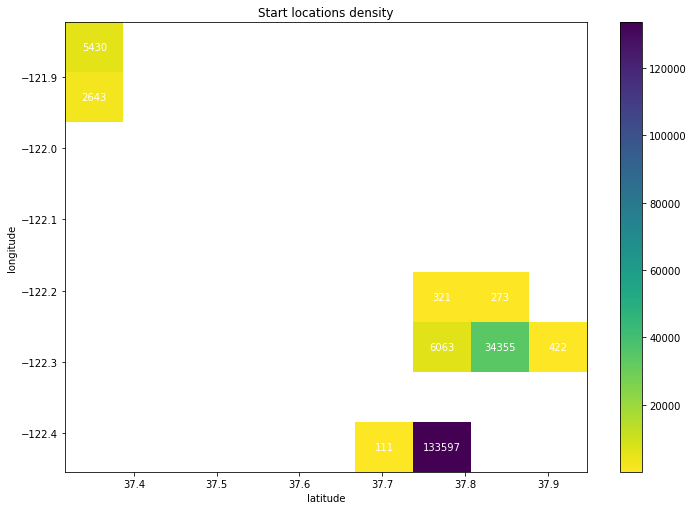

In [7]:
# create bins
bins_x = np.arange(data.start_station_latitude.min(), data.start_station_latitude.max()+0.09, 0.07)
bins_y = np.arange(data.start_station_longitude.min(), data.start_station_longitude.max()+0.09, 0.07)

#set figsize = 11.69x8.27
plt.figure(figsize=[ 11.69, 8.27])

#create plt
h2d = plt.hist2d(data = data, x = 'start_station_latitude', y = 'start_station_longitude',cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y]);

#set title, label, legend
plt.title("Start locations density")
plt.colorbar()
plt.xlabel('latitude')
plt.ylabel('longitude')

# set count is first h2d
counts = h2d[0]

# Add text annotation on each cell
# Loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 100: # increase visibility on darker cells
            plt.text(bins_x[i]+0.035, bins_y[j]+0.035, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.035, bins_y[j]+0.035, int(c),
                     ha = 'center', va = 'center', color = 'black')

##  End locations density

> Observation 2:
- The coordinates at the end position have the same dispersion as the coordinates at the starting position
- The starting position has the highest concentration at the position with x coordinates from about 37.7 to 37.8, y coordinates from about -122.5 to about -122.4.
- The starting position has the second highest concentration at the position with x coordinates from about 37.8 to 37.9, y coordinates from about -122.25 to about -122.3.

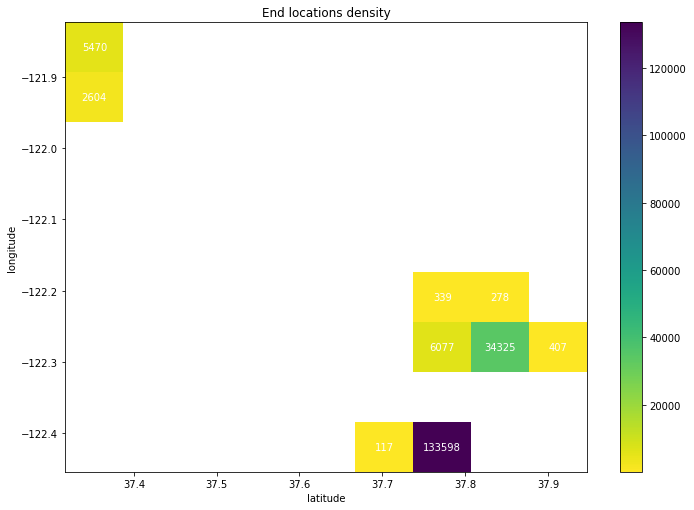

In [8]:
# create bins
bins_x = np.arange(data.end_station_latitude.min(), data.end_station_latitude.max()+0.09, 0.07)
bins_y = np.arange(data.end_station_longitude.min(), data.end_station_longitude.max()+0.09, 0.07)

#set figsize = 11.69x8.27
plt.figure(figsize=[ 11.69, 8.27])

#create plt
h2d = plt.hist2d(data = data, x = 'end_station_latitude', y = 'end_station_longitude',cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y]);

#set title, label, legend
plt.title("End locations density")
plt.colorbar()
plt.xlabel('latitude')
plt.ylabel('longitude')

# set count is first h2d
counts = h2d[0]

# Add text annotation on each cell
# Loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 100: # increase visibility on darker cells
            plt.text(bins_x[i]+0.035, bins_y[j]+0.035, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.035, bins_y[j]+0.035, int(c),
                     ha = 'center', va = 'center', color = 'black')

## frequent trips

> Observation :
- Trips usually start in the range start_station_id 0 to 160 and arrive in the range end_station_id 0 to 160

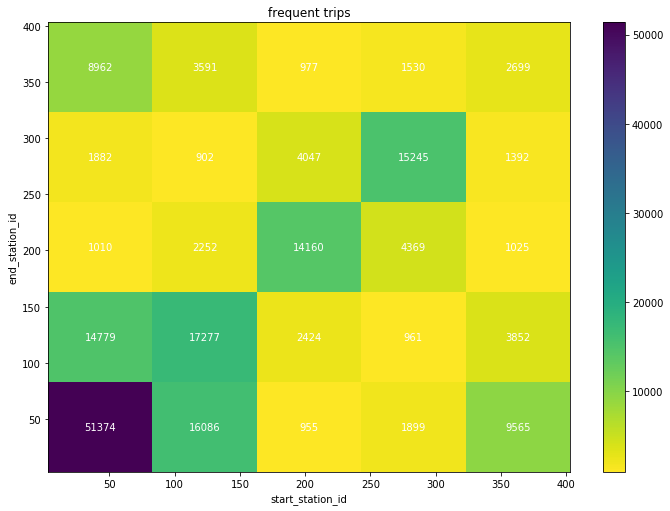

In [10]:
# create bins
bins_x = np.arange(data.start_station_id.min(), data.start_station_id.max()+80, 80)
bins_y = np.arange(data.end_station_id.min(), data.end_station_id.max()+80, 80)

#set figsize = 11.69x8.27
plt.figure(figsize=[ 11.69, 8.27])

#create plt
h2d = plt.hist2d(data = data, x = 'start_station_id', y = 'end_station_id',cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y]);

#set title, label, legend
plt.title("frequent trips")
plt.colorbar()
plt.xlabel('start_station_id')
plt.ylabel('end_station_id')

# set count is first h2d
counts = h2d[0]

# Add text annotation on each cell
# Loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 100: # increase visibility on darker cells
            plt.text(bins_x[i]+40, bins_y[j]+40, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+40, bins_y[j]+40, int(c),
                     ha = 'center', va = 'center', color = 'black')

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 366868 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
